In [ ]:
using Revise
using PrevisibilityCrawler
using StatsBase
pc = PrevisibilityCrawler;

In [6]:
windowsize = 15
idloss(loss, a, b) = loss
prevloss = idloss;
model =  BicLassoModel();
pipe = Pipeline(model, rmae);
algo = Algorithm(prevloss, minsamples=100, k=5);
sizes = [500]

signal = ar1(1000+windowsize)
x, y, reference = make_x_y_ref(signal, windowsize);
scorefunction = training(x, y, algo, pipe);
x100, y100 = random_points(500, sizes, length(y), scorefunction);

signal = [ar1(800);wn2(100);wn(100+windowsize, 6)]
x, y, reference = make_x_y_ref(signal, windowsize);
scorefunction = training(x, y, algo, pipe);
x80, y80 = random_points(500, sizes, length(y), scorefunction);

signal = [ar1(600);wn2(200);wn(200+windowsize, 6)]
x60, y60, reference = make_x_y_ref(signal, windowsize);
scorefunction = training(x, y, algo, pipe);
x60, y60 = random_points(500, sizes, length(y), scorefunction);

signal = [ar1(500);wn2(250);wn(250+windowsize, 6)]
x, y, reference = make_x_y_ref(signal, windowsize);
scorefunction = training(x, y, algo, pipe);
x50, y50 = random_points(500, sizes, length(y), scorefunction);

signal = [ar1(400);wn2(300);wn(300+windowsize, 6)]
x, y, reference = make_x_y_ref(signal, windowsize);
scorefunction = training(x, y, algo, pipe);
x40, y40 = random_points(500, sizes, length(y), scorefunction);

signal = [ar1(300);wn2(350);wn(350+windowsize, 6)]
x, y, reference = make_x_y_ref(signal, windowsize);
scorefunction = training(x, y, algo, pipe);
x30, y30 = random_points(500, sizes, length(y), scorefunction);


signal = [ar1(200);wn2(400);wn(400+windowsize, 6)]
x, y, reference = make_x_y_ref(signal, windowsize);
scorefunction = training(x, y, algo, pipe);
x20, y20 = random_points(500, sizes, length(y), scorefunction);

signal = wn(1000+windowsize)
x, y, reference = make_x_y_ref(signal, windowsize);
scorefunction = training(x, y, algo, pipe);
x0, y0 = random_points(500, sizes, length(y), scorefunction);

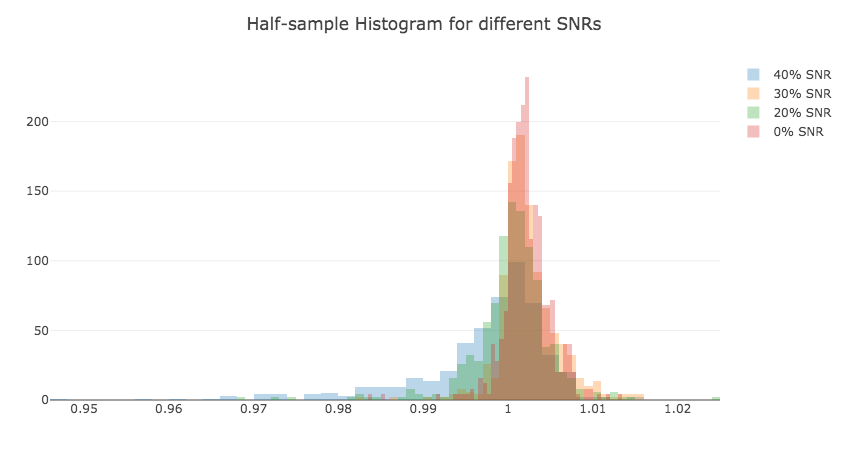

In [7]:
hist100 = pty.histogram(x=y100, opacity=.7, name="100% SNR");
hist80 = pty.histogram(x=y80, opacity=.7, name="80% SNR", histnorm="probability density");
hist60 = pty.histogram(x=y60, opacity=.7, name="60% SNR", histnorm="probability density");
hist50 = pty.histogram(x=y50, opacity=.4, name="50% SNR", histnorm="probability density");
hist40 = pty.histogram(x=y40, opacity=.3, name="40% SNR", histnorm="probability density");
hist30 = pty.histogram(x=y30, opacity=.3, name="30% SNR", histnorm="probability density");
hist20 = pty.histogram(x=y20, opacity=.3, name="20% SNR", histnorm="probability density");
hist0 = pty.histogram(x=y0, opacity=.3, name="0% SNR", histnorm="probability density");
 
pty.plot([hist40, hist30, hist20, hist0], 
          pty.Layout(title="Half-sample Histogram for different SNRs", barmode="overlay"))

In [10]:
using CSV, DataFrames
x = CSV.read("data/csv_files/brfs3_x.csv");
y = CSV.read("data/csv_files/brfs3_y.csv");
control = CSV.read("data/csv_files/brfs3_control.csv");

In [33]:
windowsize = 15
idloss(loss, a, b) = loss
prevloss = idloss;
param = ["max_depth"=>2, "eta"=>.6, "subsample"=>1, "objective"=>"reg:linear"]
model = XgBoostModel(Dict(:param => param, :nr_round => 10));
pipe = Pipeline(model, rmae);
algo = Algorithm(prevloss, minsamples=500, k=3);
sizes = [1000]

xtemp = convert(Matrix{Float64}, x[1:2000, :]);
ytemp = convert(Matrix{Float64}, y[1:2000, :]);
scorefunction = training(xtemp, ytemp, algo, pipe);
xreal, yreal = random_points(500, sizes, length(ytemp), scorefunction);

In [ ]:
using CSV, DataFrames
x = CSV.read("data/csv_files/brfs3_x.csv");
y = CSV.read("data/csv_files/brfs3_y.csv");
xtemp = convert(Matrix{Float64}, x[1:2000, :]);
ytemp = convert(Matrix{Float64}, y[1:2000, :]);
params = Dict(:maxdepth=>6, :nfeatures=>10, :sampleportion=>0.6, :ntrees=>100)
model = RandomForestModel(Dict(:params => params));
halfsample(xtemp, ytemp, model, "BRFS3")

In [ ]:
function halfsample(x, y, model, name::String="")
    idloss(loss, a, b) = loss
    sizes = [1000]
    prevloss = idloss;
    pipe = Pipeline(model, rmae);
    algo = Algorithm(prevloss, minsamples=500, k=3);
    scorefunction = training(x, y, algo, pipe);
    xreal, yreal = random_points(500, sizes, length(y), scorefunction);
    histreal = pty.histogram(x=yreal, opacity=.7, name=name, histnorm="probability density");
    pty.plot([histreal], 
          pty.Layout(title="Half-sample Histogram for $name Data", barmode="overlay"))
end

In [ ]:
params = Dict(:maxdepth=>6, :nfeatures=>10, :sampleportion=>0.6, :ntrees=>100)
model = RandomForestModel(Dict(:params => params));
pipe = Pipeline(model, rmae);
crossvalidation!(pipe, xtemp, ytemp)

In [37]:
param = ["max_depth"=>2, "eta"=>.6, "subsample"=>1, "objective"=>"reg:linear"]
model = XgBoostModel(Dict(:param => param, :nr_round => 10));
pipe = Pipeline(model, rmae);
crossvalidation!(pipe, xtemp, ytemp)

(0.89439026642568, 0.9593599951062821)

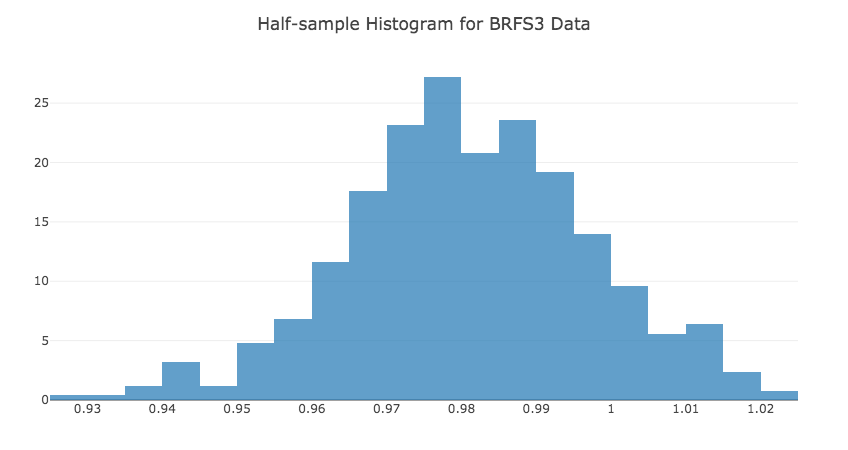

In [34]:
histreal = pty.histogram(x=yreal, opacity=.7, name="BFRS3", histnorm="probability density");
pty.plot([histreal], 
          pty.Layout(title="Half-sample Histogram for BRFS3 Data", barmode="overlay"))